# Previous Lesson Overview - Day 10 Pandas_Math

In the previous lesson you learned about dataframes: 

1. Introduction to math and stats with dataframes
2. Introduction to groupby and pivot tables

# Day 11: Advanced plotting
We will learn how to create plots from big datasets, bulding on the pandas skills we learned in the past three days.

# Goals:

Students will be able to :

1. Explore data with the seaborn plotting library
2. Write functions to make figures from daframes
3. Make figures with FacetGrid and save figures
4. Make simple maps
5. Make gifs

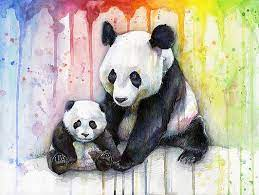

# System version when preparing this notebook
- python 3.8.11
- pandas 1.1.3
- numpy 1.20.3
- Seaborn 0.11.1

This lesson was prepared by Maria D Hernadez Limon for NRT Environment Science Bootcamps 2021. 

# Set-Up working Space

In [ ]:
import pandas as pd
import numpy as np

import re
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#seaborn - more advanced plotting options but always import matplotlib too as some seaborn utility comes from matplot
import seaborn as sns


In [ ]:
##some libraries that allow is to run from stats 
import scipy
from scipy import stats

In [ ]:
#this is the specific directory where the data we want to use is stored
datadirectory = '../data/'

#this is the directory where we want to store the data we finish analyzing
data_out_directory='../output/'

# 17.  SEABORN
[seaborn](https://seaborn.pydata.org/) is a visualization tool based on matplotlib. 

You can look at the seaborn **[gallery](https://seaborn.pydata.org/examples/index.html)** and look at all the plotting options it offers.

we import as:

`import seaborn as sns` and after we load matplot.

Seaborn has both axes-level plotting functions and figure-level plotting functions.

If a seaborn plot has the following text in the description **'This is an Axes-level function'** then you need to map it on to a figure level object that we can make with matplotlib. If it says **'Figure-level interface for drawing relational plots onto a FacetGrid'** then you don't need to use map on to some figure level object because it already is one.

To plot we need to select some data.

In [ ]:
temp_data=pd.read_csv(datadirectory+'Temp_data_2010-2020.csv')
temp_data

# 17.1 Axes-level plotting functions
Reminder, for axes-level plotting functions we must first make a figure level object.

# lineplot 
https://seaborn.pydata.org/generated/seaborn.lineplot.html

The hue option allows me to plot based on diff categories I have.

There are close to 20,000 points on this graph so using date in the x-axis is going to be messy no matter what we do.

### select a smaller subset of the data for easier visuals

In [ ]:
#use loc to select a specific year - here I selected 2018
temp_data_subset=temp_data.loc[temp_data['Year']==2018,]
temp_data_subset

# Make a customized lineplot

Let's make a line plot of Month vs TempF, one line per lake for the year we selected

# with matplot

In [ ]:
fig, ax = plt.subplots()

plt.plot("Month","Temp_F",data=temp_data_subset.loc[temp_data_subset['Lake']=='SU'],label='SU')
plt.plot("Month","Temp_F",data=temp_data_subset.loc[temp_data_subset['Lake']=='MI'],label='MI')
plt.plot("Month","Temp_F",data=temp_data_subset.loc[temp_data_subset['Lake']=='HU'],label='HU')
plt.plot("Month","Temp_F",data=temp_data_subset.loc[temp_data_subset['Lake']=='ER'],label='ER')
plt.plot("Month","Temp_F",data=temp_data_subset.loc[temp_data_subset['Lake']=='ON'],label='ON')

plt.legend()
plt.show()

this approach takes a lot of code, we are plotting the same thing multiple times and only changing the lake so it would be great to have the option to tell python we want a line for each lake...

# with seaborn

In [ ]:
sns.lineplot(x="Month", y="Temp_F", hue="Lake",data=temp_data_subset,palette="Set1")

**Seaborn** to the rescue, with the **hue** command we can tell python to make a line for each item in hue

To make a plot with seaborn we can simply call sns.someplot to get a plot.  But to customize we need to add axes- more below- but writing one line of code to get a plot is great to explore data

### Note: if you don't specify ax, seaborn will make a plot but it will print a line reminding you that the plot is an axes level figure. In order to customize anything in the plot you will need to call the axes.

### Make into a figure - customize with axes

In [ ]:
#make the figure object using matplotlib
fig, ax = plt.subplots()

#set the sns plot to the ax axis
ax=sns.lineplot(x="Month", y="Temp_F", hue="Lake",data=temp_data_subset,palette="Set1")

#or 
#sns.lineplot(x="Month", y="Temp_F", hue="Lake",data=temp_data_subset,palette="Set1",ax=ax)

#to make changes we call ax as Katie taught us
ax.set_xlabel('Month number')

plt.show()

We can see the seasonal temperature pattern in the lakes. We also see that Eries (smallest lake - most southern) is usually the warmest and that Superior (the largest- most northern lake) is the coldest.

# [Heatplot](https://seaborn.pydata.org/generated/seaborn.heatmap.html) - quick data analysis example


In [ ]:
pokemon=pd.read_csv(datadirectory+'Pokemon.csv')
pokemon

In [ ]:
def make_heat(cols_to_keep,agg_fun_wanted):
    """With this function we can group type and generation by different power stats and get a heatplot"""
    
    #let's group our pokemon with groupby- reference notebook from day10
    pokemon_grouped=pokemon.groupby(['Generation','Type 1'])[cols_to_keep].agg(agg_fun_wanted).reset_index().set_index(['Generation','Type 1'])
    
    #all these commands are matplot level commands
    
    #set the figure space
    fig, ax = plt.subplots()
    #sets the size of the figure based on how many paramters we input
    fig.set_size_inches(len(cols_to_keep)*3,15)
    
    #will make a heatmap 
    sns.heatmap(pokemon_grouped,cmap="RdBu_r",center=100,ax=ax)
    
    #keep the axes level empty
    ax.set_xlabel('')
    #show the plot
    plt.show()

make_heat(['Attack','Defense','HP'],[max,min])

# 17.2 [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) - Multi-plot grid for plotting conditional relationships.


With FacetGrid you create a figure level object that you contains space for multiple subplots then you map plots onto each grid.

Thus we no longer need for loops to make figures with subplots. However, there will be times when a for loop is the best option!

In [ ]:
g= sns.FacetGrid(temp_data, col="Lake",  row="Month")
g

In [ ]:
g = sns.FacetGrid(temp_data, col="Lake",  row="Month")

#scatterplot takes and x and y val so we pass them to the map function below
g.map_dataframe(sns.scatterplot, "Year", "Temp_F")

## Make modifications to the figure by calling g.some_command - Takes a minute to run
Here are some of the commands I use most often, see the facetgrid doc for more options.

In [ ]:
g = sns.FacetGrid(temp_data, col="Lake",  row="Month")
#scatterplot takes x and Y so we pass those to map_dataframe
g.map_dataframe(sns.scatterplot, "Year", "Temp_F",hue="Year",palette="tab20")

#main title
g.fig.suptitle(f'Average Annual Surface Water Temperature')

#subplot titles
g.set_titles(col_template="{col_name} Temp", row_template="month={row_name}")

#add legend
g.add_legend()

#labels (x,y)
g.set_axis_labels("Temperature F", "Time")

#limits
g.set(xlim=(2010, 2020), ylim=(0, 100), xticks=[2010, 2015, 2020], yticks=[20, 40, 60,80, 100])

#add text
def annotate(data, **kws):
    n = data.shape[0]
    ax = plt.gca()
    ax.text(.1, .6, f"Num obs = {n}", transform=ax.transAxes)
    
g.map_dataframe(annotate)

#set size -- I'll comment this for now so seaborn find the best size
#g.fig.set_size_inches(24,24)

#save
g.tight_layout()
g.fig.subplots_adjust(wspace=.05,top=.96)
#g.savefig(data_out_directory+"gl_facet_plot.png")

## - Legend 
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

# - colors and palettes
https://matplotlib.org/stable/tutorials/colors/colormaps.html

# 17.2 Skill Check

Violin plots- combination of box plot and kernel density plot
https://seaborn.pydata.org/generated/seaborn.violinplot.html

Violin plots are axes level figures. Use the methods I showed you above to make a 2 (rows) by 3 (cols) figure, where each subplot holds a violin plot for each generation(your col value, and x). The value represented in the violinplots is Attack (your y val) and I want a violin for each Type 1 (your hue val). 


In [ ]:
#set up your facetgrid here, I've already selected that we want 3 cols, update the col input
g = sns.FacetGrid(pokemon,col=your_column_here,col_wrap=3)

"""
Now let's map violinplot to the grid space we made- look at the violinplot documentation to see the variables
available,hint: You will need x,y,hue and I've already added palette.

g.map_dataframe(sns.violinplot,x=same_as_colum_above,
y=what_value_we_want_in_violin,hue=what_does_each_violin_represent,palette='tab20')"""


#your clean commands here
g.map_dataframe(?)

### I already cleaned up the plot for you but make sure this makes sense to you ###
#let's add a legend- no more code needed
g.add_legend()
#add some labels- no more code needed
g.set_axis_labels("", "Attack")
#hide x ticks - no more code needed
g.set_xticklabels([])
#for figure size - no more code needed
g.fig.set_size_inches(16,6)


#let'see our plot
g

# 17.3 FacetGrid included - More complicated example

# [lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html)

This is one of my favorite plots, it's so easy to make and shows a lot of information. 

Here I use a lot of the options within lmplot but keep in mind that most are optional for aesthetic purposes.

In [ ]:
#call lmplot since we want subplots and use the arguments for lmplot to customize plot
g=sns.lmplot(x="Year", y="Temp_F", col="Lake", x_estimator=np.mean, ci=95,fit_reg=True,
             data=temp_data,col_wrap=3, height=4, col_order=['SU','MI','HU','ER','ON'],
             line_kws={'color': 'red','alpha': 0.9, 'lw':.9},scatter_kws={'s': 30, 'alpha': 0.8, 'color':'black'})

#figure level changes
g.fig.set_size_inches(9,6)
g.fig.suptitle(f'Average Annual Surface Water Temperature')
g.fig.subplots_adjust(wspace=.15,top=.9)

#all the commands are showed you earlier can be attached to each other!! these are subplot level changes
g.set_axis_labels("Year", 'Temperature ($^\circ$F)').set(xlim=(2010, 2020))

#to save
g.savefig(data_out_directory+"gl_temp_over_time.pdf")

# 17.4 Recap: AxesSubplot vs Facetgrid

In [ ]:
#AxesSubplot - will plot all in one plot
sns.boxplot(x="Month", y="Temp_F", data=temp_data,hue='Lake',whis=[0, 100], width=.6, palette="RdBu")

In [ ]:
#facegrid - use facetgrid for make multiple subplots 
#can also only make one plot if you change the col argument, play with it yourself
sns.catplot(x="Month", y="Temp_F", col="Lake",
                data=temp_data, kind="box",height=4, aspect=.7,palette="RdBu")

Again: If a seaborn plot has the following text in the description **'This is an Axes-level function'** then you need to map it on to a facetgrid or matplot fig object like I did for scatterplot. 

If it says **'Figure-level interface for drawing relational plots onto a FacetGrid.'** then you don't need to use this mapping technique because this plot type is already built on facegrid. 

# 17.5  For loop to the rescue

In [ ]:
#for reference
pokemon.head()

### I want to make multiple scatter plots that show all_stats v some_stat. Fit a line and get an r<sup>2</sup> 

My first ituition was to use relplot (the figure level version of scatterplot). 
However, facetgrid requires that I have categories to choose from in my table. Sure I could reshape the pokemon table mand make a plotting function to make it work with facetgrid but it would take me more code/time to do it that way than if I did it with a for loop. Besides I want to add some text so I think a foor loop is best here.

#### more on [relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot)

In [ ]:
#first attemp
sns.relplot(data=pokemon,x="Defense", y="Attack", hue="Generation")

In [ ]:
#second attemp
sns.relplot(data=pokemon,x="Defense", y="Attack",col='Generation',hue="Generation",col_wrap=3)

## Step 1: Make subplot with a foor loop that adds to a figure we have made

In [ ]:
#set up working space we will add subplots with the for loop
fig = plt.figure()
fig.subplots_adjust(hspace=0.3, wspace=0.2)

################################### EDIT THIS SECTION TO CHANGE SUBPLOTS ################
#select stats for y_axis wanted, this will change the number of subplots- 

#only upto 2*3 otherwise change subplot num in for loop----------EDIT to change loop
stats_all=['HP','Attack','Total','Sp. Atk','Sp. Def','Speed']
#select the stat for the x_axis--------EDIT to change loop
x_stat='Defense'

#########################################################################################
#set figure size
fig.set_size_inches(15,8)

for count,y_stat in enumerate(stats_all):
    #remember that for position we need three numbers, they need to be intergers 
    ax = fig.add_subplot(2, 3, int(count+1))
    
    #let's create a boolean command so only the first subplot had a legend for generation
    if count>0:
        #myplot - siple regression plot
        ax=sns.scatterplot(x=x_stat, y=y_stat, data=pokemon,hue='Generation',legend=None)
    else:
        #myplot - siple regression plot
        ax=sns.scatterplot(x=x_stat, y=y_stat, data=pokemon,hue='Generation')
        
    ax.set_xlabel(x_stat,fontsize=18)
    ax.set_ylabel(y_stat,fontsize=18)
    

#show my figure
plt.show()


### Ok, made my plots, the labels are weird but we will fix them later, next let's find some stats

## Step 2: Add stats - and text box

In [ ]:
#set up working space we will add subplots with the for loop
fig = plt.figure()
fig.subplots_adjust(hspace=0.3, wspace=0.2)

################################### EDIT THIS SECTION TO CHANGE SUBPLOTS ################
#select stats for y_axis wanted, this will change the number of subplots- 

#only upto 2*3 otherwise change subplot num in for loop----------EDIT to change loop
stats_all=['HP','Attack','Total','Sp. Atk','Sp. Def','Speed']
#select the stat for the x_axis--------EDIT to change loop
x_stat='Defense'

#########################################################################################
#set figure size
fig.set_size_inches(15,8)

for count,y_stat in enumerate(stats_all):
    #remember that for position we need three numbers, they need to be intergers 
    ax = fig.add_subplot(2, 3, int(count+1))
    
    #let's create a boolean command so only the first subplot had a legend for generation
    if count>0:
        #myplot - siple regression plot
        ax=sns.scatterplot(x=x_stat, y=y_stat, data=pokemon,hue='Generation',legend=None)
    else:
        #myplot - siple regression plot
        ax=sns.scatterplot(x=x_stat, y=y_stat, data=pokemon,hue='Generation')
        
    ax.set_xlabel(x_stat,fontsize=18)
    ax.set_ylabel(y_stat,fontsize=18)
    
    
    #####get stats and add them here with a line ####
    
    #regplot doesn't print any stats so let's use scipy to get some stats and add it to our plots
    ##get stats for a label
    #we use [[]] to select columns from dataframes
    temp=pokemon[[x_stat,y_stat]].dropna()
    #same as pokemon.loc[,[x_stat,y_stat]].dropna()
    results=stats.linregress(temp.iloc[:,0],temp.iloc[:,1])
    #print (results)

    #######this code makes the labels in the box
    
    props=dict(boxstyle='round',facecolor='white',alpha=.4)
    #here is a useful example of .format where you can chane the number format
    textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.2f}\np={:.3}'.format(results[0],results[1],results[2]**2,results[3]) #grabs the values from stats_out
    # here the {} hold the formatting for each value that we will pass to format, the \n means we want a new line
    ax.text(.75,.05,textstr,transform=ax.transAxes,va='bottom',fontsize=11,bbox=props) #change the formatting of the box

plt.show()

### Now, I have stats, but labels and the text with stats stills looks weird,let's add my regression line then fix the layout

## Step 3: Add a line plot to the scatter plots

In [ ]:
#set up working space we will add subplots with the for loop
fig = plt.figure()
fig.subplots_adjust(hspace=0.3, wspace=0.2)

################################### EDIT THIS SECTION TO CHANGE SUBPLOTS ################
#select stats for y_axis wanted, this will change the number of subplots- 

#only upto 2*3 otherwise change subplot num in for loop----------EDIT to change loop
stats_all=['HP','Attack','Total','Sp. Atk','Sp. Def','Speed']
#select the stat for the x_axis--------EDIT to change loop
x_stat='Defense'

#########################################################################################
#set figure size
fig.set_size_inches(15,8)

for count,y_stat in enumerate(stats_all):
    #remember that for position we need three numbers, they need to be intergers 
    ax = fig.add_subplot(2, 3, int(count+1))
    
    #let's create a boolean command so only the first subplot had a legend for generation
    if count>0:
        #myplot - siple regression plot
        ax=sns.scatterplot(x=x_stat, y=y_stat, data=pokemon,hue='Generation',legend=None)
    else:
        #myplot - siple regression plot
        ax=sns.scatterplot(x=x_stat, y=y_stat, data=pokemon,hue='Generation')
        
    ax.set_xlabel(x_stat,fontsize=18)
    ax.set_ylabel(y_stat,fontsize=18)
    
    
    #####get stats and add them here with a line ####
    
    #regplot doesn't print any stats so let's use scipy to get some stats and add it to our plots
    ##get stats for a label
    #we use [[]] to select columns from dataframes
    temp=pokemon[[x_stat,y_stat]].dropna()
    #same as pokemon.loc[,[x_stat,y_stat]].dropna()
    results=stats.linregress(temp.iloc[:,0],temp.iloc[:,1])
    #print (results)

    ##this code makes the labels in the box
    props=dict(boxstyle='round',facecolor='white',alpha=.4)
    #here is a useful example of .format where you can chane the number format
    textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.2f}\np={:.3}'.format(results[0],results[1],results[2]**2,results[3]) #grabs the values from stats_out
    # here the {} hold the formatting for each value that we will pass to format, the \n means we want a new line
    ax.text(.75,.05,textstr,transform=ax.transAxes,va='bottom',fontsize=11,bbox=props) #change the formatting of the box

    ##### add a line plot
    
    #this code here allows me to make a line manually
    x1=np.array([temp[x_stat].min(),temp[x_stat].max()])
    y1=results[0]*x1+results[1]
    #this will plot my line on top of the line from regplot
    ax.plot(x1,y1)

#show my figure
plt.show()

#to save
#plt.savefig(data_out_directory+"pokemon_scatter.pdf")

### Ok added a line, let's add a title to each plot, the equation line under the title and fix the layout issue

## Step 4: Add text, fix layout, save, and show

In [ ]:
#set up working space we will add subplots with the for loop
fig = plt.figure()
fig.subplots_adjust(hspace=0.3, wspace=0.2)

################################### EDIT THIS SECTION TO CHANGE SUBPLOTS ################
#select stats for y_axis wanted, this will change the number of subplots- 

#only upto 2*3 otherwise change subplot num in for loop----------EDIT to change loop
stats_all=['HP','Attack','Total','Sp. Atk','Sp. Def','Speed']
#select the stat for the x_axis--------EDIT to change loop
x_stat='Defense'

#########################################################################################
#set figure size
fig.set_size_inches(15,8)

for count,y_stat in enumerate(stats_all):
    #remember that for position we need three numbers, they need to be intergers 
    ax = fig.add_subplot(2, 3, int(count+1))
    
    #let's create a boolean command so only the first subplot had a legend for generation
    if count>0:
        #myplot - siple regression plot
        ax=sns.scatterplot(x=x_stat, y=y_stat, data=pokemon,hue='Generation',legend=None)
    else:
        #myplot - siple regression plot
        ax=sns.scatterplot(x=x_stat, y=y_stat, data=pokemon,hue='Generation')
        
    ax.set_xlabel(x_stat,fontsize=18)
    ax.set_ylabel(y_stat,fontsize=18)
    
    
    #####get stats and add them here with a line ####
    
    #regplot doesn't print any stats so let's use scipy to get some stats and add it to our plots
    ##get stats for a label
    #we use [[]] to select columns from dataframes
    temp=pokemon[[x_stat,y_stat]].dropna()
    #same as pokemon.loc[,[x_stat,y_stat]].dropna()
    results=stats.linregress(temp.iloc[:,0],temp.iloc[:,1])
    #print (results)

    ##this code makes the labels in the box
    props=dict(boxstyle='round',facecolor='white',alpha=.4)
    #here is a useful example of .format where you can chane the number format
    textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.2f}\np={:.3}'.format(results[0],results[1],results[2]**2,results[3]) #grabs the values from stats_out
    # here the {} hold the formatting for each value that we will pass to format, the \n means we want a new line
    ax.text(.75,.05,textstr,transform=ax.transAxes,va='bottom',fontsize=11,bbox=props) #change the formatting of the box

    ##### add a line plot
    
    #this code here allows me to make a line manually
    x1=np.array([temp[x_stat].min(),temp[x_stat].max()])
    y1=results[0]*x1+results[1]
    #this will plot my line on top of the line from regplot
    ax.plot(x1,y1)

    ## add line equation as a title
    m=results[0]
    b=results[1]
    ax.set_title('y={:.3f}x+{:.2f}'.format(m,b))

#add a figure title
plt.suptitle(f'Relationship: Stat vs {x_stat}',fontsize=18)

#use tight_layout to fix the layout issues we are gaving 
plt.tight_layout()

#to save
plt.savefig(data_out_directory+"pokemon_scatter.pdf")

#show my figure
plt.show()

That looks really nice, but changing the arguments in the loop everytime I want a differnt plot will be annoying, let's automate with a function.

## Step 5: Make a function and test

In [ ]:
def make_pokemon_plot(x_stat='Defense',stats_all=['HP','Attack','Total','Sp. Atk','Sp. Def','Speed']):
    
    """This function will plot some stat vs all the other stat values, with a line, the equation to the line 
    and simple summary stats. The function can be mofidied to plot up to 6 subplots"""

    #set up working space we will add subplots with the for loop
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.3, wspace=0.2)

    ################################### EDIT THIS SECTION TO CHANGE SUBPLOTS ################
    #select stats for y_axis wanted, this will change the number of subplots- 

    ################ add these as arguments to function
    #stats_all=['HP','Attack','Total','Sp. Atk','Sp. Def','Speed']
    #x_stat='Defense'
    #########################################################################################
    
    #set figure size
    fig.set_size_inches(15,8)

    for count,y_stat in enumerate(stats_all):
        #remember that for position we need three numbers, they need to be intergers
        
        ######these lines will change based on our inputs and edit our layout ####
        if len(stats_all)<=3:
            ax = fig.add_subplot(1, len(stats_all), int(count+1))
        elif len(stats_all)==4:
            ax = fig.add_subplot(2, 2, int(count+1))
        else:
            ax = fig.add_subplot(2, 3, int(count+1))
            
        ###############

        #let's create a boolean command so only the first subplot had a legend for generation
        if count>0:
            #myplot - siple regression plot
            ax=sns.scatterplot(x=x_stat, y=y_stat, data=pokemon,hue='Generation',legend=None)
        else:
            #myplot - siple regression plot
            ax=sns.scatterplot(x=x_stat, y=y_stat, data=pokemon,hue='Generation')

        ax.set_xlabel(x_stat,fontsize=18)
        ax.set_ylabel(y_stat,fontsize=18)


        #####get stats and add them here with a line ####

        #regplot doesn't print any stats so let's use scipy to get some stats and add it to our plots
        ##get stats for a label
        #we use [[]] to select columns from dataframes
        temp=pokemon[[x_stat,y_stat]].dropna()
        #same as pokemon.loc[,[x_stat,y_stat]].dropna()
        results=stats.linregress(temp.iloc[:,0],temp.iloc[:,1])
        #print (results)

        ##this code makes the labels in the box
        props=dict(boxstyle='round',facecolor='white',alpha=.4)
        #here is a useful example of .format where you can chane the number format
        textstr='m={:.3f}\nb={:.3f}\n$r^2$={:.2f}\np={:.3}'.format(results[0],results[1],results[2]**2,results[3]) #grabs the values from stats_out
        # here the {} hold the formatting for each value that we will pass to format, the \n means we want a new line
        ax.text(.75,.05,textstr,transform=ax.transAxes,va='bottom',fontsize=11,bbox=props) #change the formatting of the box

        ##### add a line plot

        #this code here allows me to make a line manually
        x1=np.array([temp[x_stat].min(),temp[x_stat].max()])
        y1=results[0]*x1+results[1]
        #this will plot my line on top of the line from regplot
        ax.plot(x1,y1)

        ## add line equation as a title
        m=results[0]
        b=results[1]
        ax.set_title('y={:.3f}x+{:.2f}'.format(m,b))

    #add a figure title
    plt.suptitle(f'Relationship: Stat vs {x_stat}',fontsize=18)

    #use tight_layout to fix the layout issues we are gaving 
    plt.tight_layout()

    #to save - 
    #the name will be in the fstring and will note the x_stats and how many other stats we called
    plt.savefig(data_out_directory+f"pokemon_scatter{x_stat}vsOthers{len(stats_all)}.pdf")

    #show my figure
    plt.show()

In [ ]:
make_pokemon_plot(stats_all=['HP','Attack'],x_stat='Defense')

In [ ]:
make_pokemon_plot(stats_all=['HP','Total','Speed','Defense'],x_stat='Attack')

In [ ]:
make_pokemon_plot(stats_all=['HP','Total','Speed','Defense','Attack'],x_stat='Speed')

These plots are a combination of matplot and seaborn plus many of the skills we have reviewed in class. There is so mcuh more you can do!

## [SEABORN GALLERY](http://seaborn.pydata.org/examples/index.html)

# 18. Maps

### [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) Python library for maps.

### [Good Cartopy Intro](https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html)
### [Good Tutorial](https://coderzcolumn.com/tutorials/data-science/cartopy-basic-maps-scatter-map-bubble-map-and-connection-map)

In [ ]:
#for colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [ ]:
import cartopy
import cartopy.crs as crs
import cartopy.feature as cfeature

print (cartopy.__version__)

In [ ]:
#create a new figure and add on via ax
plt.figure(figsize=(8,6))

#we will add a projection of the map to ax then add to it
ax = plt.axes(projection=crs.PlateCarree())

plt.show()

## [List of Cartopy Projections](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html)

In [ ]:
#the size of our figure frame
plt.figure(figsize=(8,6))

#flat projection
ax = plt.axes(projection=crs.PlateCarree())

#add coastline
ax.coastlines()
#add countries
ax.add_feature(cfeature.BORDERS, linestyle="-")
#add lakes
ax.add_feature(cfeature.LAKES, color="blue")

plt.show()

In [ ]:
plt.figure(figsize=(8,6))

#more realistic spherical projection
ax = plt.axes(projection=crs.Orthographic())

#add coastline
ax.coastlines()
#add ocean
ax.add_feature(cartopy.feature.OCEAN,color='blue')

#add countries
ax.add_feature(cfeature.BORDERS,color='white')
#add land
ax.add_feature(cartopy.feature.LAND)


plt.show()

## Let's look at the places were Maria has sampled on the Great Lakes

In [ ]:
gl_stations=pd.read_csv(datadirectory+'gl_stations.csv')
gl_stations

In [ ]:
#select the center points based on the mean of the points I do have
central_lat = gl_stations['LATITUDE'].mean()
central_lon = gl_stations['LONGITUDE'].mean()

#extent is the [west_point,east_point,south_point,north_point]
extent = [gl_stations['LONGITUDE'].min()-2, gl_stations['LONGITUDE'].max()+2,
          gl_stations['LATITUDE'].min()-2, gl_stations['LATITUDE'].max()+2]

#create a figure
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=crs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)

#add features
ax.add_feature(cartopy.feature.LAKES,edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)

#setting labels to true will give me labels on x and y axis
ax.gridlines(draw_labels=True)

##add multiple points -- to add multiple points we use scatteplot but we must pass crs.PlateCarree() in transform,
#maybe there are other ways but this is teh only way it works for me
ax.scatter(x=gl_stations.LONGITUDE, y=gl_stations.LATITUDE,color="red",
            s=30,alpha=0.8,transform=crs.PlateCarree(),zorder=2)

##### THE Z-ORDER is the order in which layers are shown where 0 is first and the higher is on top, I called zorder to 2 so I could see my points 

#add labels
ax.set_title('LAURENTIAN GREAT LAKES: EPA SAMPLING STATIONS')

#I save most of my figures as .pdf until I'm ready to make manuscript figures
#you can save your plots whiever way you prefer, same commands as other plots 
plt.savefig(data_out_directory+'gl_map.pdf')

# 18. Skill Check 
### Make a map with three cities of your choice. Fill in the ? in the code below.

In [ ]:
##add your points here - the ? should be lists- 
#I want three cities you choose, and use google maps to get lat/lon
my_df=pd.DataFrame({'City':[?],
                   'Lat':[?],
                   'Lon':[?]})


#initiate my plot 
plt.figure(figsize=(12, 6))

#select a projection- this will select the best map area since we are not selecting a center and extent
ax = plt.axes(projection=crs.PlateCarree())
#using this option will allow us to see the whole Earth instead of the default slice that is chosen above
ax.set_global()

####add more to the map- add coastline, the ocean, land 
?
?
?
###add a title
?

####change the view of your points
ax.scatter(x=my_df.?, y=my_df.?,color=?,s=60,marker='x',transform=crs.PlateCarree())

#save your map-uncomment line and change file name
plt.savefig(data_out_directory+'my_map.pdf')

#then show, if you run show before save you will not save anything 
plt.show()

# 17.7 Gif
A gif is a movie, and for movies we need frames that move as a specific speed. We can thus make gifs by combining many frames that we make.

In [ ]:
temp_data

sns.boxplot
https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [ ]:
def get_colors(lake,year,val):
    """This function will grab all the temperature data for a given year and lake.
    Then with the values make a list of colors from the max to min temperature.
    This will return a color for a given temperature that falls within the range of the temperature for that year."""
    
    #select data
    summary=temp_data.loc[((temp_data['Lake']==lake) & (temp_data['Year']==year)),'Temp']
    
    #value-->color
    #to normalize our values so the colors are in scale from min to max of a given year
    norm = mpl.colors.Normalize(vmin=summary.min(), vmax=summary.max())
    ##color_list can be anything matplot recognizes, I want reds
    color_list=cm.get_cmap('Reds', 20)
    
    #grab a value from color list - that will be the normalized value from norm 
    lake_val=color_list(norm(val))
    
    #resturn our normalized color for the temperature in a given lake and year
    return lake_val

get_colors('SU',2015,19)

In [ ]:
def get_lake_plot(lake,year,temp=0,frame=1):
    """This function will return an image of the lake selcted.
    Selecet stations true to display stations or false to not."""
    
    #to center the map
    central_lat = 44.54999217647059
    central_lon = -83.57815488235293
    
    if lake == 'SU':
        extent= [-92.1518, -84.5, 46.14, 49.105667]
        lake_name='Superior'
    elif lake == 'HU':
        extent = [-84.75, -79.833833, 43.040, 46.605667]
        lake_name='Huron'
    elif lake == 'MI':
        extent = [-88, -84.8, 41.5, 46.105667]
        lake_name='Michigan'
    elif lake =='ON':
        extent=[-79.8, -75.833833, 43.2, 44.5]
        lake_name='Ontario'
    elif lake == 'ER':
        extent=[-83.5, -78.9, 41.35, 42.9]
        lake_name='Erie'
    else:
        print('check lake input')
        
    
    #plot the map
    plt.figure(figsize=(10, 4))
    ax = plt.axes(projection=crs.Orthographic(central_lon, central_lat))
    ax.set_extent(extent)
    
    #colors for each temp 
    #goes through the function we made and grabs a color for this specic value
    color=get_colors(lake,year,temp)
    ax.add_feature(cartopy.feature.LAKES,edgecolor='black',facecolor=color)

    #add labels - change size and font type here
    ax.set_title(f'EPA Sampling Stations: {lake_name} year {year} day{frame}',fontweight="bold",size=14)
    
    #to save each plot 
    plt.savefig(data_out_directory+f"/for_gif/laketemp_{lake}{frame}.jpg",dpi=600)
    
    plt.show()
    
    plt.close()

get_lake_plot('SU',2015,temp=4,frame=1)

In [ ]:
# a cooloer temp in 2015
get_lake_plot('SU',2015,temp=4,frame=1)
# a warmer temp in 2015
get_lake_plot('SU',2015,temp=19,frame=1)

# Go back and hide plt.show() to save memory

In [ ]:
def make_frames(lake,year):
    """This function will make frames for a selected lake in a given year. 
    But only for days 100-200 of the year."""
    
    years=[2015,2016,2017,2018,2019,2020]
    
    if year not in years :
        return "choose a different year"
    else:
        
        #select the lake we want- and return temperature for this selection
        lake_wanted=temp_data.loc[((temp_data['Lake']==lake) & (temp_data['Year']==year)),'Temp']
        print('Running.....')
        
        #lake wanted is a column with temperature values - 365 values, one for each day of the year
        for k,i in enumerate(lake_wanted):
            #let's print the interesting days only- so that's 100-200
            if (k>100) and (k<200): 
                #run the function to make our map and pass lake, year, 
                #the temp from our temp list, and k here is the day of the year 
                get_lake_plot(lake,year,i,k)
                print(f'frame {k} made')
        
        #this statement will print when we finish our function
        return 'frames produced'

make_frames('MI',2015)

# Making our movie

#### We can use [glob](https://docs.python.org/3/library/glob.html) to read in all the frames we made

#### We can use [PIL](https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif) to combine into a gif

In [ ]:
#glob allows us to read multiple files with the same extension quickly
import glob
#PIL allows us to make a movie
from PIL import Image

In [ ]:
#set the lake and year you already made frames for - you can also ignore the next two lines and manually change
#lines 7 and 8
lake='MI'
year=2015

# filepaths
#where the frames are
fp_in = data_out_directory+f"/for_gif/laketemp_{lake}*.jpg"
#where the movie will be saved
fp_out = data_out_directory+f"laketemp_{lake}{year}.gif"

#open all of our files using glob
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
#save the files as an img with the parameters specified below, you can play around with the settings 
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=360, loop=2)

print(" Your movie is made, check your output folder!!")

This quick code was to show you how to make gifs from maps we made but the mechanics for any movie are the same:
    
1. Make multiple iterations of your figure and save each one - this becomes your movie frames
2. Pass all the frames into img with the help of glob and you are done.
3. Open your movie and enjoy. 

# All the code in one cell - Careful when running - takes time

In [ ]:
lake='MI'
year=2015

#make frames - this one line of code has three functions associated with it!!!!
make_frames(lake,year)

# filepaths
#where the frames are
fp_in = data_out_directory+f"/for_gif/laketemp_{lake}*.jpg"
#where the movie will be saved
fp_out = data_out_directory+f"laketemp_{lake}{year}.gif"

#open all of our files using glob
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
#save the files as an img with the parameters specified below, you can play around with the settings 
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=360, loop=2)


# Summary
Today I showed you the following:

1. Explore data with the seaborn plotting library
2. Make figures with AxesSubplot and FacetGrid
3. Using for loops for complicated subplots 
4. Maps
5. Gifs